<a href="https://colab.research.google.com/github/semishen/Chinese-NLP-Practices/blob/main/10_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Data

In [ ]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/google_comments.xlsx'
google = pd.read_excel(url, index_col=0)
print(google.shape)
google.head()

(500, 3)


,username,score,comment
0,倪依芙,5,起初找不到入口，還以為沒座位，但是原來入口在旁邊樓梯～座位區不大，但是料理很好吃～肉圓的醬微...
1,Mimi龍,4,聞名已久，今天特別來現場試試，目前改成點餐機點餐， ⋯⋯更多聞名已久，今天特別來現場試試，目...
2,林昌逸,1,非常生氣服務員的態度😠服務很糟糕，麵都還沒吃完，一起身就把麵收走，擺明趕客人😡😡😡
3,林幸蓁,5,內用與外帶有不同的點餐方式內用須至店內使用機台點菜、輸入桌號並付款外帶好像只需在入口處點餐即...
4,台灣TAXI市區叫車禮車包車約拍找小鄭,5,乾淨衛生，廁所很大在地下室，有免費飲料可以喝，拉麵愛好吃，麻辣豆腐不錯、肉粽不錯，目前吃過很...


# 2. Data preprocessing
1. convert score to status (good:1, bad:0, soso:-1)
2. build a new df with status (1, 0) and comment 

In [ ]:
def score_to_status(x):
  assert isinstance(x, int), 'x is not an int'
  assert (x >= 0) and (x <= 5), 'x is out of range(0-5)'

  if x > 3:
    return 1
  elif x == 3:
    return -1
  else:
    return 0

google['status'] = google['score'].map(score_to_status)
print(google['status'].value_counts())
google.head()

 1    239
 0    201
-1     60
Name: status, dtype: int64


,username,score,comment,status
0,倪依芙,5,起初找不到入口，還以為沒座位，但是原來入口在旁邊樓梯～座位區不大，但是料理很好吃～肉圓的醬微...,1
1,Mimi龍,4,聞名已久，今天特別來現場試試，目前改成點餐機點餐， ⋯⋯更多聞名已久，今天特別來現場試試，目...,1
2,林昌逸,1,非常生氣服務員的態度😠服務很糟糕，麵都還沒吃完，一起身就把麵收走，擺明趕客人😡😡😡,0
3,林幸蓁,5,內用與外帶有不同的點餐方式內用須至店內使用機台點菜、輸入桌號並付款外帶好像只需在入口處點餐即...,1
4,台灣TAXI市區叫車禮車包車約拍找小鄭,5,乾淨衛生，廁所很大在地下室，有免費飲料可以喝，拉麵愛好吃，麻辣豆腐不錯、肉粽不錯，目前吃過很...,1


In [ ]:
df_good_bad = google[google['status'].isin([0,1])]
print(df_good_bad.shape)
df_good_bad.head()

(440, 4)


,username,score,comment,status
0,倪依芙,5,起初找不到入口，還以為沒座位，但是原來入口在旁邊樓梯～座位區不大，但是料理很好吃～肉圓的醬微...,1
1,Mimi龍,4,聞名已久，今天特別來現場試試，目前改成點餐機點餐， ⋯⋯更多聞名已久，今天特別來現場試試，目...,1
2,林昌逸,1,非常生氣服務員的態度😠服務很糟糕，麵都還沒吃完，一起身就把麵收走，擺明趕客人😡😡😡,0
3,林幸蓁,5,內用與外帶有不同的點餐方式內用須至店內使用機台點菜、輸入桌號並付款外帶好像只需在入口處點餐即...,1
4,台灣TAXI市區叫車禮車包車約拍找小鄭,5,乾淨衛生，廁所很大在地下室，有免費飲料可以喝，拉麵愛好吃，麻辣豆腐不錯、肉粽不錯，目前吃過很...,1


In [ ]:
 df = df_good_bad.loc[:,['comment','status']]
 df.head()

,comment,status
0,起初找不到入口，還以為沒座位，但是原來入口在旁邊樓梯～座位區不大，但是料理很好吃～肉圓的醬微...,1
1,聞名已久，今天特別來現場試試，目前改成點餐機點餐， ⋯⋯更多聞名已久，今天特別來現場試試，目...,1
2,非常生氣服務員的態度😠服務很糟糕，麵都還沒吃完，一起身就把麵收走，擺明趕客人😡😡😡,0
3,內用與外帶有不同的點餐方式內用須至店內使用機台點菜、輸入桌號並付款外帶好像只需在入口處點餐即...,1
4,乾淨衛生，廁所很大在地下室，有免費飲料可以喝，拉麵愛好吃，麻辣豆腐不錯、肉粽不錯，目前吃過很...,1


# 3. Word Segmentation
1. build a corpus by jieba segmentation
2. build TF-IDF matrix

In [ ]:
import jieba

corpus = []
tags = df['status'].tolist()

for c in df['comment']:
  corpus.append(' '.join(jieba.cut(c)))

corpus[0]

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.627 seconds.
Prefix dict has been built successfully.


'起初 找 不到 入口 ， 還以 為 沒 座位 ， 但是 原來 入口 在 旁邊 樓梯 ～ 座位 區不大 ， 但是 料理 很 好吃 ～ 肉圓 的 醬 微甜 ， 口感 清爽 ～ 甜不辣 醬汁 看 起來 顏色 差不多 ， 但是 口感 是 鹹 中 有 微微 辣 ， 都 很 不錯 ！ 麻醬 麵 的 麻醬 沒有 吝色 放 ， 所以 吃 起來 麻醬 能 均 勻分 佈 在 麵 上 ， 是 吃過 的 好吃 麻醬 麵 之一 ， 挺 讚 的 喔 ！ 喜番 … 今天 遇到 一位 帥氣 有型 的 國中生 讓 座 ， 真感動 ， 現在 能 遇到 單純 有禮 的 青年 學子 ， 都 是 一種 幸運 ！'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

# 4. Naive Bayes
1. split dataset as train, test
2. naive bayes analysis

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(tfidf, tags, test_size = 0.3, random_state = 42)
print(train_x.shape, test_x.shape)

(308, 2693) (132, 2693)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB(alpha=0.01)
clf1.fit(train_x, train_y)
pred_nb = clf1.predict(test_x)
print(f'acc:{clf1.score(test_x, test_y)}')

acc:0.8257575757575758


# 5. SVM

In [ ]:
from sklearn.svm import SVC
clf2 = SVC(probability=True)
clf2.fit(train_x, train_y)
pred_svm = clf2.predict(test_x)
print(f'acc:{clf2.score(test_x, test_y)}')

acc:0.8863636363636364


#6. SVM with Word2Vec
1. recontrust corpus
2. build a Word2Vec model
3. train Word2Vec
4. SVM with Word2Vec

In [ ]:
corpus_word2vec = []
for c in corpus:
  corpus_word2vec.append(c.split())
corpus_word2vec[0]

['起初',
 '找',
 '不到',
 '入口',
 '，',
 '還以',
 '為',
 '沒',
 '座位',
 '，',
 '但是',
 '原來',
 '入口',
 '在',
 '旁邊',
 '樓梯',
 '～',
 '座位',
 '區不大',
 '，',
 '但是',
 '料理',
 '很',
 '好吃',
 '～',
 '肉圓',
 '的',
 '醬',
 '微甜',
 '，',
 '口感',
 '清爽',
 '～',
 '甜不辣',
 '醬汁',
 '看',
 '起來',
 '顏色',
 '差不多',
 '，',
 '但是',
 '口感',
 '是',
 '鹹',
 '中',
 '有',
 '微微',
 '辣',
 '，',
 '都',
 '很',
 '不錯',
 '！',
 '麻醬',
 '麵',
 '的',
 '麻醬',
 '沒有',
 '吝色',
 '放',
 '，',
 '所以',
 '吃',
 '起來',
 '麻醬',
 '能',
 '均',
 '勻分',
 '佈',
 '在',
 '麵',
 '上',
 '，',
 '是',
 '吃過',
 '的',
 '好吃',
 '麻醬',
 '麵',
 '之一',
 '，',
 '挺',
 '讚',
 '的',
 '喔',
 '！',
 '喜番',
 '…',
 '今天',
 '遇到',
 '一位',
 '帥氣',
 '有型',
 '的',
 '國中生',
 '讓',
 '座',
 '，',
 '真感動',
 '，',
 '現在',
 '能',
 '遇到',
 '單純',
 '有禮',
 '的',
 '青年',
 '學子',
 '，',
 '都',
 '是',
 '一種',
 '幸運',
 '！']

In [ ]:
from gensim.models import word2vec

# params
seed = 42
sg = 0
window_size = 10
vector_dim = 1000
min_count = 1
workers = -1
epochs = 1000
sample = 1e-5 

model = word2vec.Word2Vec(
  corpus_word2vec,
  min_count = min_count,
  size = vector_dim,
  workers=workers,
  iter=epochs,
  window=window_size,
  sg=sg,
  seed=seed,
  sample = sample
)
len(model.wv.vocab)

3319

In [ ]:
w2v_vecs = []
w2v_tags = []
for tag, s in zip(tags, corpus_word2vec):
  vec = np.zeros(vector_dim)
  cnt = 0
  for w in s:
    if w in model:
      vec += model.wv.get_vector(w)
      cnt += 1
  if cnt > 0:
    w2v_vecs.append(vec / cnt) # use average to represent sentence
    w2v_tags.append(tag)

# sentence vector
w2v_x = np.array(w2v_vecs)
print(w2v_x.shape)

# target
w2v_y = np.array(w2v_tags)
print(w2v_y.shape)

(440, 1000)
(440,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys


In [ ]:
train_w2v_x, test_w2v_x, train_w2v_y, test_w2v_y = train_test_split(w2v_x, w2v_y, test_size = 0.3, random_state = 42)
print(train_w2v_x.shape)
print(test_w2v_x.shape)

(308, 1000)
(132, 1000)


In [ ]:
clf3 = SVC(probability=True)
clf3.fit(train_w2v_x, train_w2v_y)
pred_w2v_svm = clf3.predict(test_w2v_x)
print(f'acc:{clf3.score(test_w2v_x, test_w2v_y)}')

acc:0.7803030303030303


# 7. BERT
1. load simpletransformers lib
2. recontract df good:1, bad:0
2. build and train BERT model

In [ ]:
! pip install simpletransformers

In [ ]:
train_df, eval_df = train_test_split(df, test_size = 0.3, random_state = 42)
print(train_df.shape)
print(eval_df.shape)

(308, 2)
(132, 2)


In [ ]:
from simpletransformers.classification import ClassificationModel as CM

bert_model_args = {
    "num_train_epochs": 5
}
clf4 = CM('bert', 'bert-base-chinese', args=bert_model_args)
clf4.train_model(train_df, args = {'overwrite_output_dir': True})
result, model_output, wrong_predictions = clf4.eval_model(eval_df)
bert_acc = (result['tn'] + result['tp'])/ (result['tn'] + result['tp'] + result['fn'] + result['fp'])
print(f'acc:{bert_acc}')

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassificati

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:776: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."



acc:0.9545454545454546


# 8. Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc_nb = accuracy_score(test_y,pred_nb)
acc_svm = accuracy_score(test_y,pred_svm)
acc_w2v_svm = accuracy_score(test_w2v_y,pred_w2v_svm)

print('Naive Bayes: ', acc_nb)
print('SVM: ', acc_svm)
print('SVM with Word2Vec: ', acc_w2v_svm)
print('BERT: ', bert_acc)


Naive Bayes:  0.8257575757575758
SVM:  0.8863636363636364
SVM with Word2Vec:  0.7803030303030303
BERT:  0.9545454545454546


# 9. AUC
1. compute predict possinilities
2. calculate AUC base on roc_curve()

In [ ]:
pred_nb_p = clf1.predict_proba(test_x)
pred_svm_p = clf2.predict_proba(test_x)
pred_w2v_svm_p = clf3.predict_proba(test_w2v_x)
                         
nb_dic = {
    'pred_y':pred_nb_p[:,1],
    'test_y':test_y
}

svm_dic = {
    'pred_y':pred_svm_p[:,1],
    'test_y':test_y
}

w2v_svm_dic = {
    'pred_y':pred_w2v_svm_p[:,1],
    'test_y':test_w2v_y
}

bert_dic = {
    'pred_y':model_output[:,1],
    'test_y':eval_df['status']
}

In [ ]:
from sklearn.metrics import auc, roc_curve

model_dict = {
    'nb': nb_dic,
    'svm': svm_dic,
    'w2v_svm': w2v_svm_dic,
    'bert': bert_dic
}

for key, value in model_dict.items():
  fpr, tpr, thresholds = roc_curve(value['test_y'],value['pred_y'])
  print(f'{key} auc: {auc(fpr, tpr)}') 

nb auc: 0.9074380165289256
svm auc: 0.9537190082644628
w2v_svm auc: 0.8835891381345927
bert auc: 0.9860684769775678


# 10. ROC curve

133
132
133
133


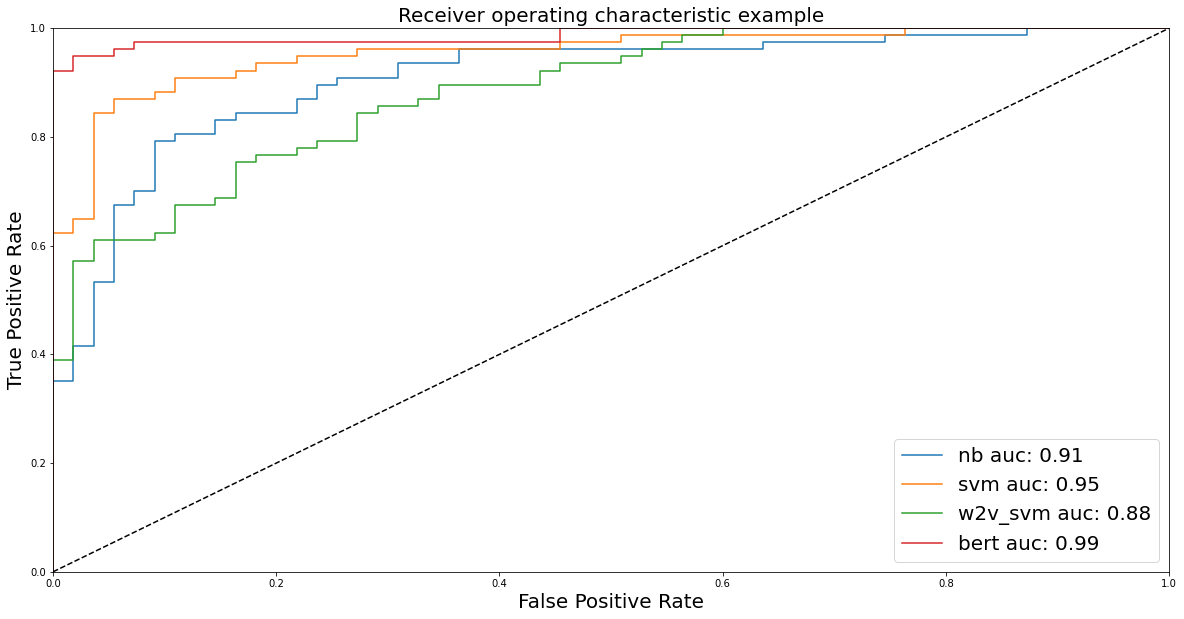

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])

for key, value in model_dict.items():
  fpr, tpr, thresholds = roc_curve(value['test_y'],value['pred_y'], drop_intermediate=False)

  plt.plot(fpr, tpr, label=f'{key} auc: {auc(fpr, tpr):.2f}' )

plt.plot([0, 1], [0, 1], 'k--') # diagonal

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()